# Iris Flower Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/IRIS.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape

(150, 5)

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
#count the value
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [13]:
#finding the null value
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

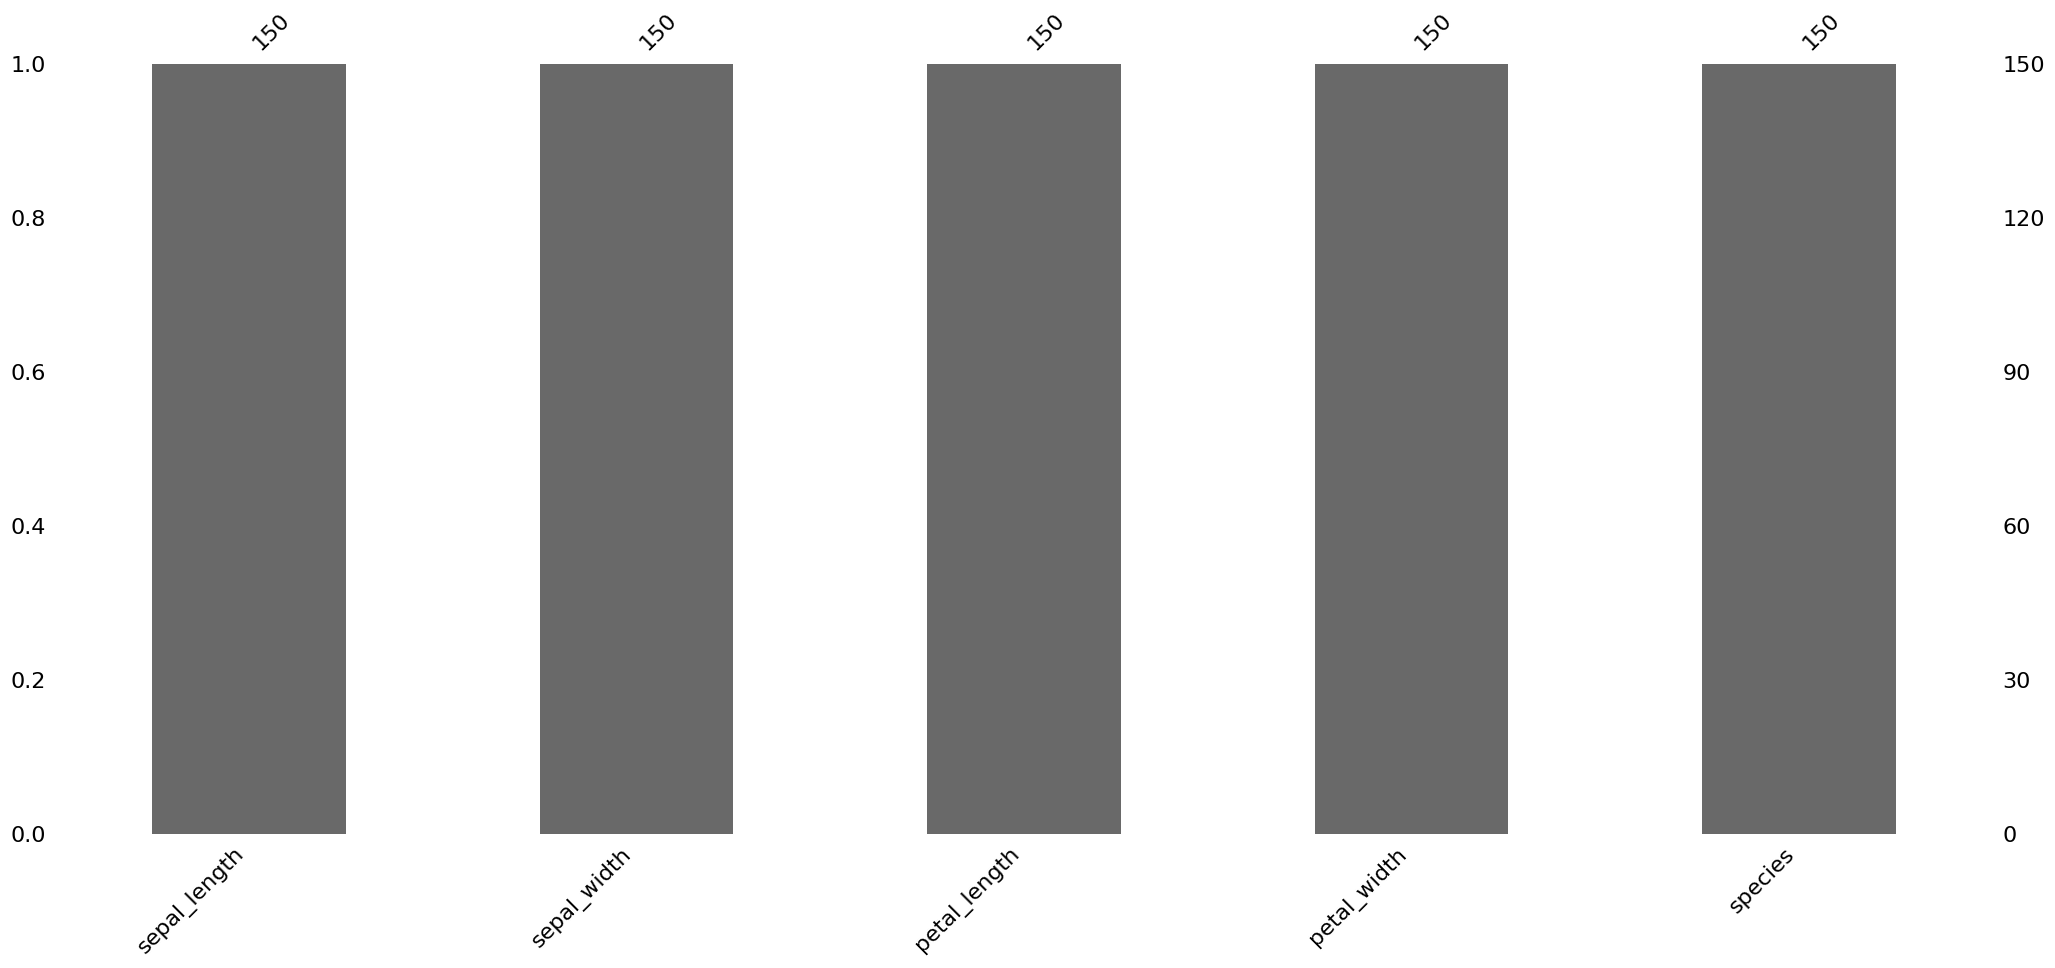

In [14]:
import missingno as msno
msno.bar(df)

In [15]:
df.drop_duplicates(inplace=True)

## EDA

Relationship between species and sepal length

<Axes: xlabel='species', ylabel='sepal_length'>

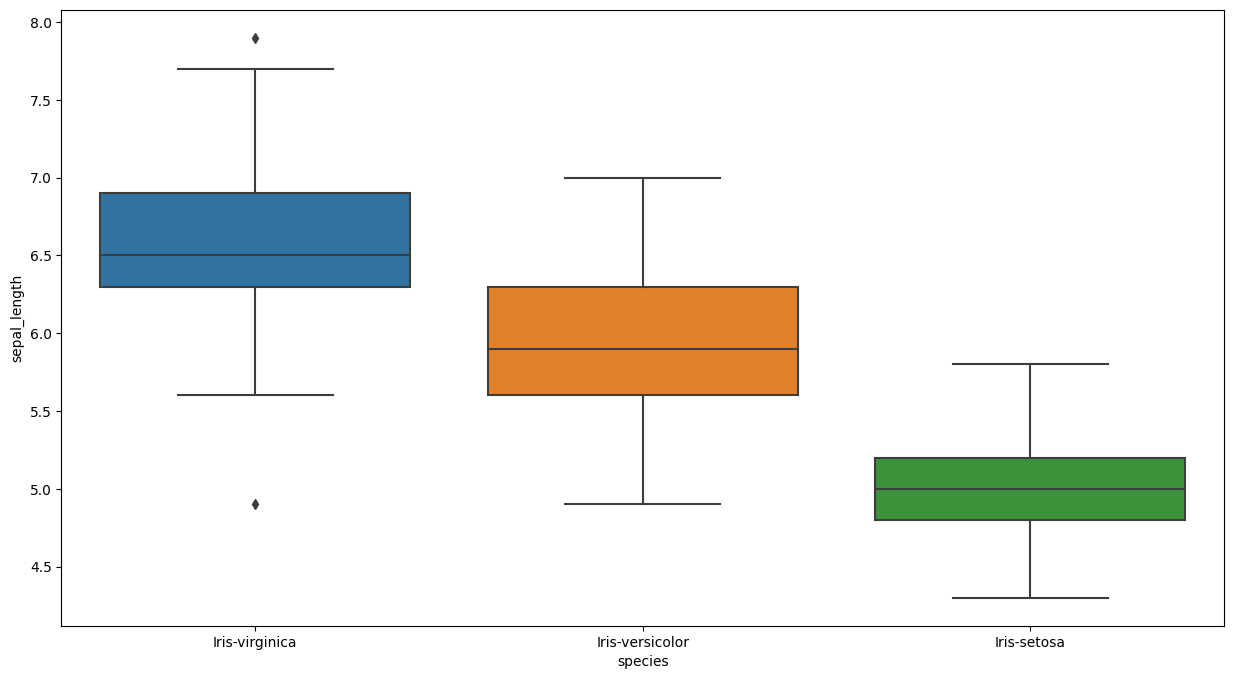

In [18]:
plt.figure(figsize=(15,8))
sns.boxplot(x='species',y='sepal_length',data=df.sort_values('sepal_length',ascending=False))

Relationship between species and sepal width

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

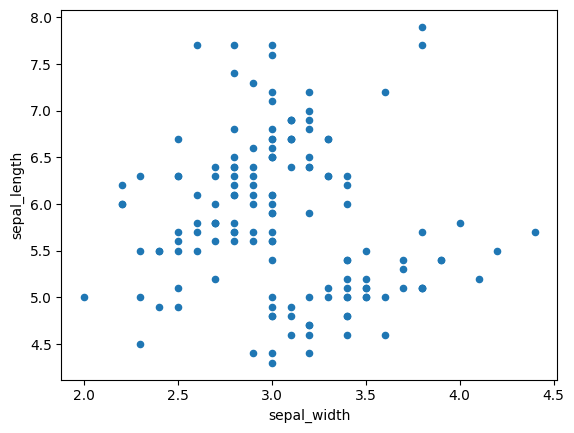

In [19]:
df.plot(kind='scatter',x='sepal_width',y='sepal_length')

Relationship between sepal width and sepal length

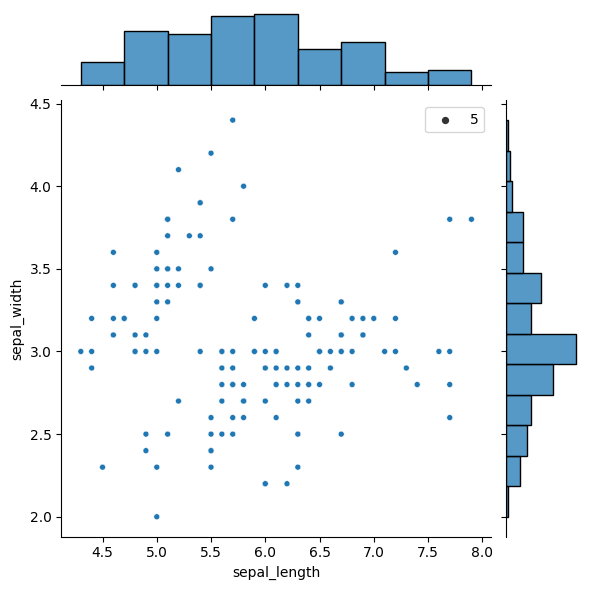

In [20]:
sns.jointplot(x="sepal_length", y="sepal_width", data=df, size=5)

Pairplot

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1500x800 with 0 Axes>

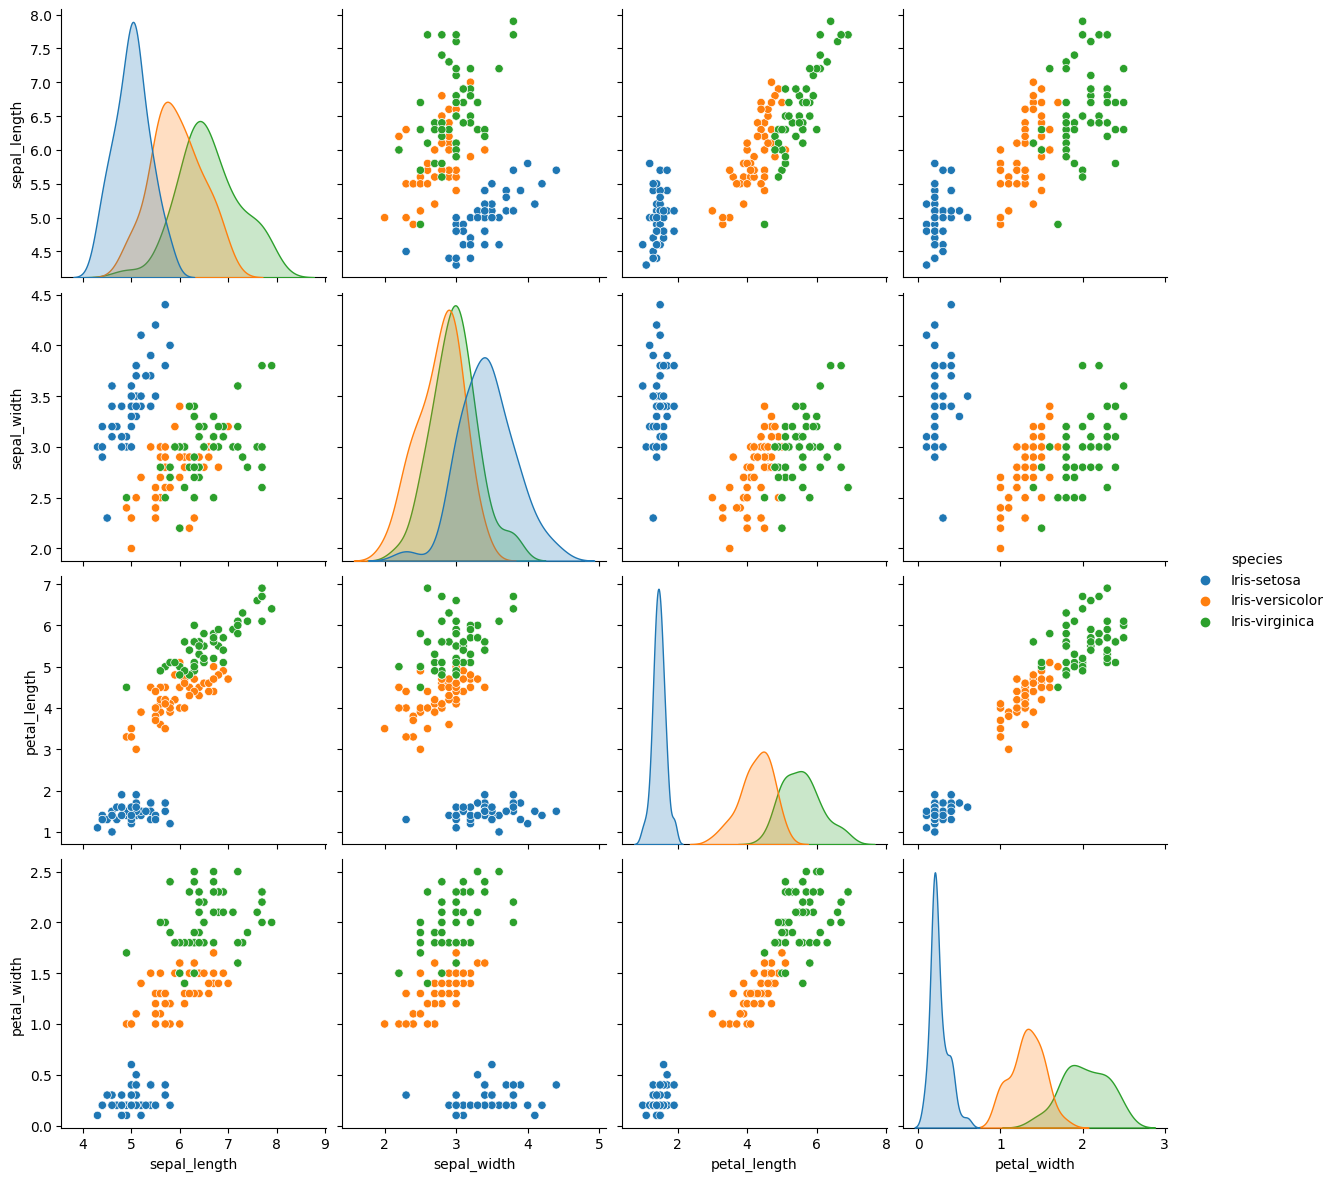

In [26]:
plt.figure(figsize=(15,8))
sns.pairplot(df, hue="species", size=3)
plt.show()

Boxplot

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

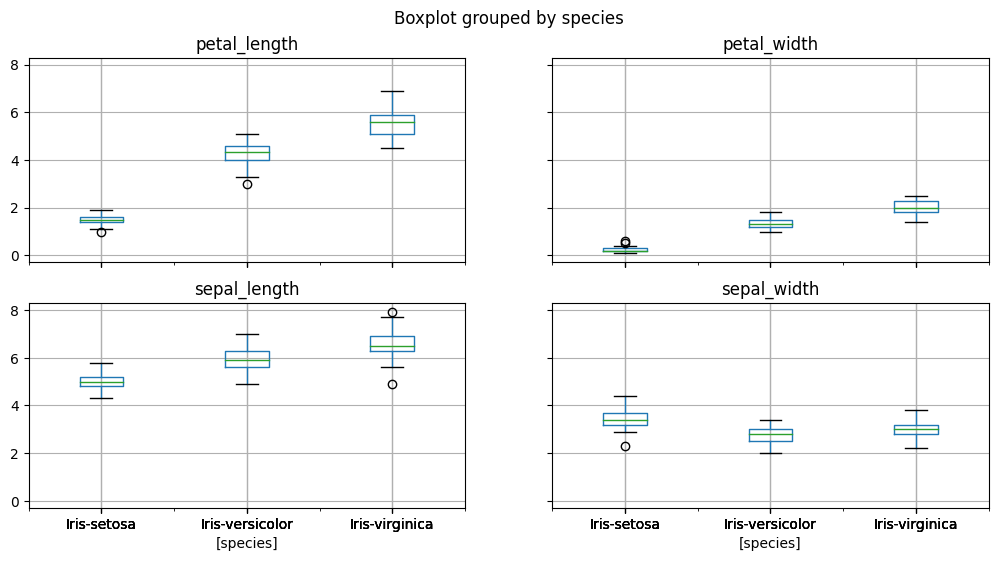

In [28]:
df.boxplot(by="species", figsize=(12, 6))

<ipython-input-32-6b51bb3694af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")


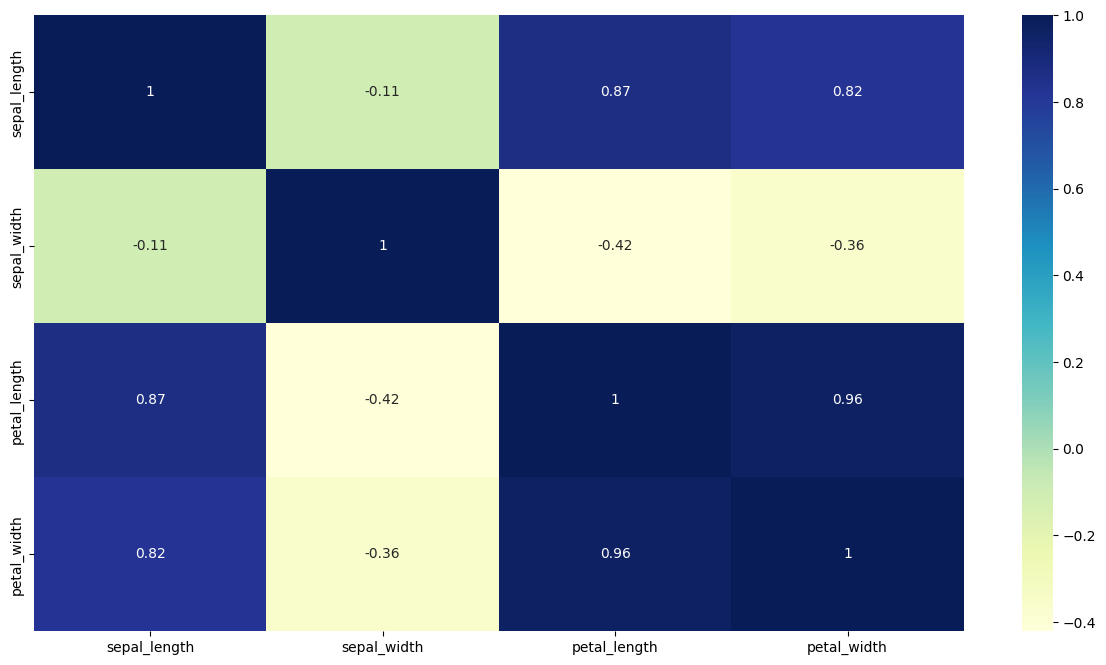

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

## Model Training with Sequential

In [35]:
X=df.drop('species',axis=1)
y=df['species']

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [42]:
df['species'] = pd.Categorical(df.species)
df['species'] = df.species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(df.species)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=123)

In [45]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [46]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 0s 28ms/step - loss: 0.4276 - accuracy: 0.9829 - val_loss: 0.4316 - val_accuracy: 0.9000
Epoch 2/45
4/4 [==============================] - 0s 11ms/step - loss: 0.4215 - accuracy: 0.9829 - val_loss: 0.4269 - val_accuracy: 0.9000
Epoch 3/45
4/4 [==============================] - 0s 11ms/step - loss: 0.4164 - accuracy: 0.9829 - val_loss: 0.4235 - val_accuracy: 0.9000
Epoch 4/45
4/4 [==============================] - 0s 11ms/step - loss: 0.4106 - accuracy: 0.9658 - val_loss: 0.4188 - val_accuracy: 0.9000
Epoch 5/45
4/4 [==============================] - 0s 11ms/step - loss: 0.4054 - accuracy: 0.9829 - val_loss: 0.4136 - val_accuracy: 0.9000
Epoch 6/45
4/4 [==============================] - 0s 11ms/step - loss: 0.4017 - accuracy: 0.9829 - val_loss: 0.4086 - val_accuracy: 0.9000
Epoch 7/45
4/4 [==============================] - 0s 11ms/step - loss: 0.3956 - accuracy: 0.9829 - val_loss: 0.4042 - val_accuracy: 0.9333
Epoch 8/45
4/4 [===========

In [57]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 24ms/step - loss: 0.2813 - accuracy: 0.9333


[0.2812903821468353, 0.9333333373069763]

In [58]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 18ms/step
[[4.4205684e-02 7.4035019e-01 2.1544413e-01]
 [4.6080411e-03 2.7307117e-01 7.2232085e-01]
 [9.4151229e-01 5.7721719e-02 7.6599861e-04]
 [9.7722459e-01 2.2616867e-02 1.5854144e-04]
 [1.0456862e-02 4.2329228e-01 5.6625086e-01]
 [1.9926867e-03 2.2487162e-01 7.7313578e-01]
 [9.3268001e-01 6.6229850e-02 1.0901118e-03]
 [1.0335593e-02 4.8913625e-01 5.0052810e-01]
 [9.6969181e-01 2.9984126e-02 3.2402345e-04]
 [4.7446853e-03 3.7676704e-01 6.1848831e-01]]


In [59]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[1 2 0 0 2 2 0 2 0 2]
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [60]:
history.history['accuracy']

[0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9658119678497314,
 0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9743589758872986,
 0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9743589758872986,
 0.9829059839248657,
 0.9743589758872986,
 0.9743589758872986,
 0.9743589758872986,
 0.9829059839248657,
 0.9743589758872986,
 0.9743589758872986,
 0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9743589758872986,
 0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9829059839248657,
 0.9743589758872986,
 0.9743589758872986]

In [61]:
history.history['val_accuracy']

[0.8999999761581421,
 0.8999999761581421,
 0.8999999761581421,
 0.8999999761581421,
 0.8999999761581421,
 0.8999999761581421,
 0.9333333373069763,
 0.8999999761581421,
 0.8999999761581421,
 0.8999999761581421,
 0.8999999761581421,
 0.8999999761581421,
 0.8999999761581421,
 0.8999999761581421,
 0.8999999761581421,
 0.8999999761581421,
 0.8999999761581421,
 0.8999999761581421,
 0.8999999761581421,
 0.8999999761581421,
 0.8999999761581421,
 0.9333333373069763,
 0.9333333373069763,
 0.8999999761581421,
 0.9333333373069763,
 0.9333333373069763,
 0.8999999761581421,
 0.8999999761581421,
 0.8999999761581421,
 0.9333333373069763,
 0.8999999761581421,
 0.9333333373069763,
 0.9333333373069763,
 0.9666666388511658,
 0.9333333373069763,
 0.9333333373069763,
 0.9333333373069763,
 0.9333333373069763,
 0.8999999761581421,
 0.9333333373069763,
 0.9333333373069763,
 0.9333333373069763,
 0.8999999761581421,
 0.9666666388511658,
 0.9333333373069763]

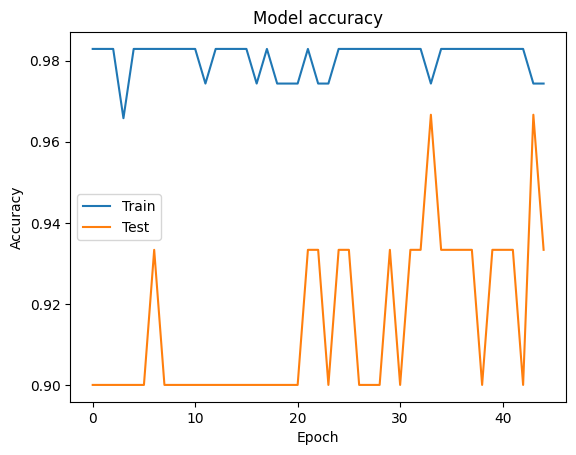

In [62]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()


In [64]:
# Install necessary packages
!apt-get install -y texlive-xetex
!apt-get install -y texlive-fonts-recommended
!apt-get install -y texlive-generic-recommended
!apt-get install -y pandoc

# Install Python package for pandoc
!pip install pypandoc

# Convert Colab notebook to PDF
!jupyter nbconvert --to PDF "/content/drive/MyDrive/Colab Notebooks/Iris Flower Classification.ipynb"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package texlive-generic-recommended
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Iris Flower Classification.ipynb to PDF
[NbConvertApp] Support files will be in Iris Flower Cla